# Import libraries

In [2]:
# libs to read and show data
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np


# Import data

In [12]:
df = pd.read_csv('../data/df_arabica_clean.csv',  index_col=0)

# Dataset analysis

In [40]:
print(f'Dataset has:\n'
      f'\t{df.shape[0]} rows\n'
      f'\t{df.shape[1]} columns')

types = pd.DataFrame(dict(
    field=df.dtypes.keys(),
    type=df.dtypes.values
))

print('')
print('Columns Types: ')
print(types)

Dataset has:
	207 rows
	40 columns

Columns Types: 
                    field     type
0                      ID    int64
1       Country of Origin   object
2               Farm Name   object
3              Lot Number   object
4                    Mill   object
5              ICO Number   object
6                 Company   object
7                Altitude   object
8                  Region   object
9                Producer   object
10         Number of Bags    int64
11             Bag Weight   object
12     In-Country Partner   object
13           Harvest Year   object
14           Grading Date   object
15                  Owner   object
16                Variety   object
17                 Status   object
18      Processing Method   object
19                  Aroma  float64
20                 Flavor  float64
21             Aftertaste  float64
22                Acidity  float64
23                   Body  float64
24                Balance  float64
25             Uniformity  float64
26 

## Taking a look

In [41]:
df.head(10)

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,NaN,Taiwan Coffee Laboratory,1668,Chimaltenango,Emilio Antonio Medina Garcia,...,87.00,10.7,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,NaN,Taiwan Coffee Laboratory,1250,Chiayi,黃保錫,...,86.92,9.1,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
7,7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,"The 2022 Pacific Rim Coffee Summit,T050",七彩琉璃咖啡莊園,NaN,Taiwan Coffee Laboratory,1200,Chiayi,莊家榮,...,86.75,10.0,0,0,yellow green,1,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
8,8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,"The 2022 Pacific Rim Coffee Summit,T018",亮軒咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Chiayi,鍾旭亮,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
9,9,"Tanzania, United Republic Of",MASHIMA AMCOS,CN 4127230034/4189230113,GOURMET COFFEE MILL,033/DE/503/002 and 033/DE/268/002,DORMAN (T) LIMITED,1400-1700,KILIMANJARO,DORMAN (T) LIMITED,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",Kenya Coffee Traders Association,"P.O. Box 646 00100Nairobi, Kenya, Denniss Prit...",Benson Kibicho Kamau - +254 786 821 621


# Cleaning data

## Missing values ratio

In [42]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


## Unique values

In [43]:
uniques = []
for column in df.columns:
    col_uniques = len(df[column].unique())
    uniques.append([column, col_uniques])
    
uniques_df = pd.DataFrame({"Unique Values": [v[1] for v in uniques]}, index=[v[0] for v in uniques])
uniques_df

,Unique Values
ID,207
Country of Origin,22
Farm Name,173
Lot Number,188
Mill,163
ICO Number,68
Company,72
Altitude,98
Region,121
Producer,173


## Parsing Dates

In [44]:
try: 
  df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()
except:
  pass

df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = pd.to_datetime(df['Expiration'])
df[['Harvest Year', 'Expiration']]

,Harvest Year,Expiration
0,2021-01-01,2023-09-21
1,2021-01-01,2023-11-15
2,2021-01-01,2023-11-15
3,2022-01-01,2023-09-21
4,2022-01-01,2024-03-05
...,...,...
202,2022-01-01,2024-02-02
203,2022-01-01,2024-03-02
204,2021-01-01,2023-11-11
205,2023-01-01,2024-03-07


# Exploring data

## Selecting _Coffee quality scores_

In [45]:
attributes = [
  'Aroma', 
  'Flavor', 
  'Aftertaste', 
  'Acidity', 
  'Body', 
  'Balance',
  'Uniformity',
  'Clean Cup',
  'Sweetness'
  ]

df_analysis = df[attributes]

df_analysis.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0


# Pairplot of attributes
>
>
> Uniformity
> Clean Cup
> Sweetness
>

The attributes have low variance and indicate low power to describe the data, so, to reduce the number of attributes, we will remove these three columns.

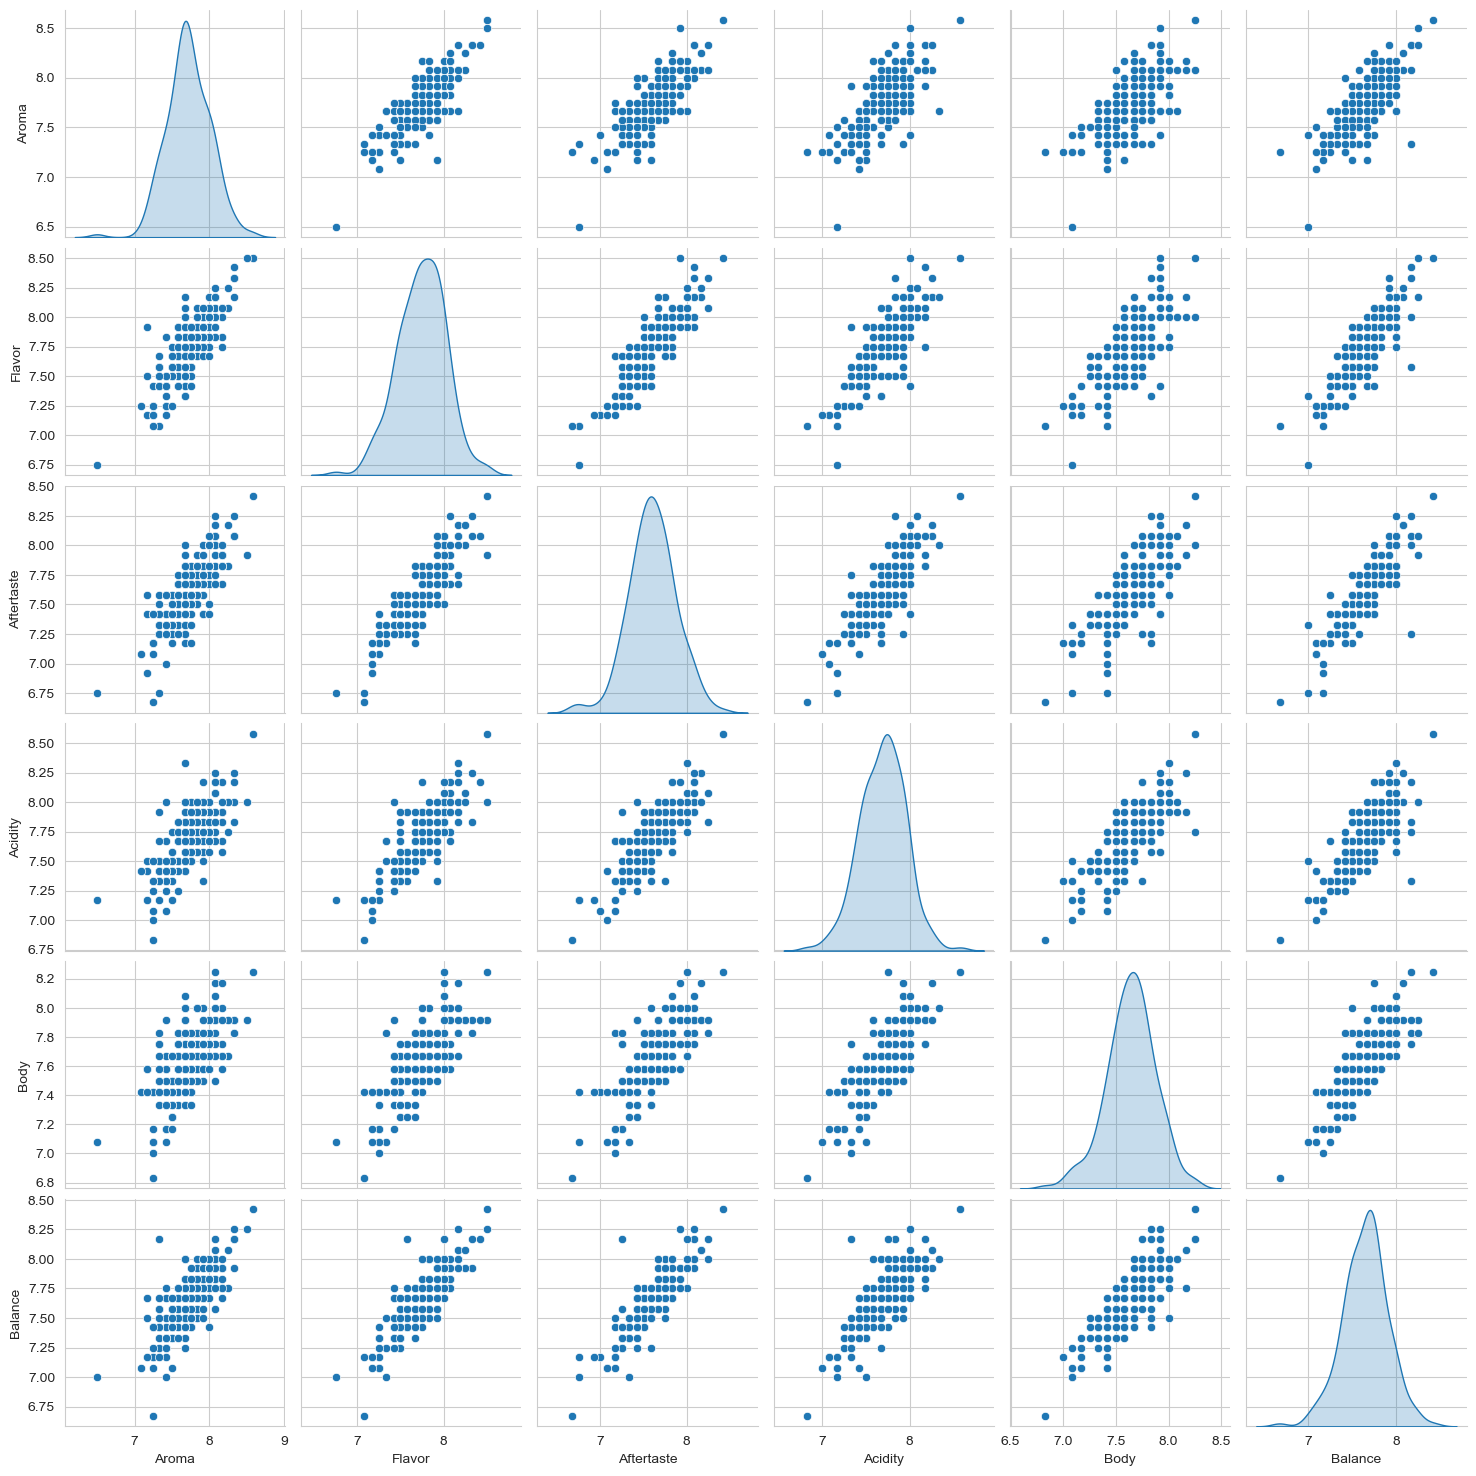

In [46]:
df_analysis = df_analysis.drop(columns=['Uniformity',
                                        'Clean Cup',
                                        'Sweetness'
                                        ])

g = sns.pairplot(df_analysis, diag_kind="kde")